<a href="https://colab.research.google.com/github/alexandre-braga/MAC026-IVP-Methods/blob/main/MAC026_Lista_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problema de Valor Inicial (PVI)
\begin{eqnarray}
 \dfrac{d y(t)}{d t} = f(t,y),  \ \ \ \ y(0)=b.
\end{eqnarray}

#Questão 1

Resolver o problema y
\begin{eqnarray}
y' = 8,  \ \ \ \ y(0) = 1.
\end{eqnarray}
Solução Exata
$$ y(t) = 8t+1 $$

Por:
Euler explícito;
Euler implícito;
Método dos trapézios.

Considere T = 1 e usar como intervalos de discretização h = 0.5 e h = 0.25. 
Apresente o gráfico dos resultados e comente o desempenho dos
diferentes métodos empregados.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def exata(t):
  return 8*t + 1

In [ ]:
def func(t,y):
  return 8

\begin{cases}
f_{j} = 8
\\
\\ Explícito: \ y_{j+1} = y_{j} + hf_{j}
\\ y_{j+1} = y_{j} + 8h
\\
\\ Implícito: \ y_{j+1} = y_{j} + hf_{j+1}
\\ y_{j+1} = y_{j} + 8h
\\
\\ Trapézios: \ y_{j+1} = y_{j} + \dfrac{h}{2}(f_{j+1} + f_{j})
\\ y_{j+1} - \dfrac{h}{2}(f_{j+1}) = y_{j} + \dfrac{h}{2}f_{j}
\\ y_{j+1} - 4h = y_{j} + 4h
\\ y_{j+1} = y_{j} + 8h
\end{cases}

In [ ]:
def Explicito(h, nel, b):
  y = np.zeros(nel+1)
  y[0] = b
  for j in range(0, nel):
    y[j+1] = y[j] + h*func(t,y[j])
  return y

def Implicito(h, nel, b):
  y = np.zeros(nel+1)
  y[0] = b
  for j in range(0, nel):
    y[j+1] = y[j] + 8*h
  return y

def Trapezio(h, nel, b):
  y = np.zeros(nel+1)
  y[0] = b
  for j in range(0, nel):
    y[j+1] = y[j] + 8*h
  return y

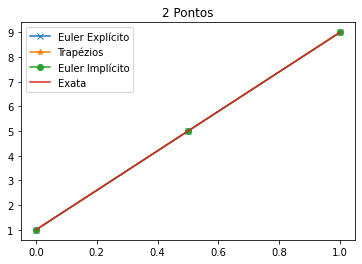

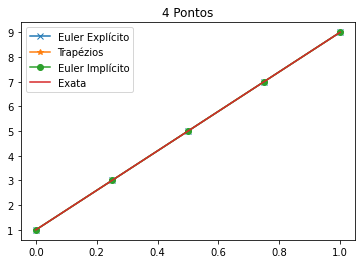

In [ ]:
refMax = 2
ti = 0
tf = 1
b = 1
h = 0.5
for k in range (0, refMax, 1):
  nel = (tf-ti)/h
  nel = int(nel)

  t = np.linspace(ti, tf, nel+1)
  tt = np.linspace(ti, tf, nel+1)
  plt.plot(t, Explicito(h, nel, b), '-x') 
  plt.plot(t, Implicito(h, nel, b), '-*') 
  plt.plot(t, Trapezio(h, nel, b), '-o') 
  plt.plot(tt,exata(tt))
  plt.legend(["Euler Explícito", "Trapézios", "Euler Implícito", "Exata"])
  plt.title("%d Pontos" %nel)
  plt.show()
  h = h/2

#Questão 2

Resolver o problema y
\begin{eqnarray}
y' = λy(1-y),  \ \ \ \ y_{0} = 10.
\end{eqnarray}
Solução Exata
\begin{eqnarray}
 y(t) = \dfrac{y_{0}e^{λt}}{1 + y_{0}(e^{λt} - 1)},  \ \ \ \ y_{0} = 10.
 \\ y(0) = \dfrac{10e^{λ0}}{1 + 10(e^{λ0} - 1)} = 10
\end{eqnarray}

Por:
\begin{cases}
Euler \ explícito;
\\ Euler \ modificado (Heun);
\\ Leapfrog;
\\ Runge-Kutta \ clássico (RK4);
\\ Adams-Bashforth \ de \ ordem 3;
\\ Método \ preditor-corretor \ de \ Ordem \ 4 \ construído \ dos \ métodos \ de \ Adams.
\end{cases}

Considere T = 50 e com número de pontos nel = 100, nel = 200, nel = 300.

a) Apresente o gráfico dos resultados e comente o desempenho dos
diferentes métodos empregados.

b) Apresente o gráfico dos erros e comente os resultados.

c) Avaliar a influência da escolha das estimativas iniciais para os métodos de
Adams-Bashforth de ordem 3 e preditor-corretor de ordem 4. Para isso, repetir
as análises realizadas com tais métodos utilizando como estimativa dos valores
iniciais, no lugar da solução exata, os valores obtidos utilizando o método de
Euler modificado e o método de Runge-Kutta clássico (RK4). Comentar os
resultados obtidos.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def exata(b, lamb, t):
  return (b * np.exp(lamb*t) ) / (1 + b*(np.exp(lamb*t) - 1) ) 

In [ ]:
def func(lamb, t, y):
  return lamb*y*(1-y) 

###Euler Explícito:


\begin{cases}
f_{j} = λy_{j}(1-y_{j})
\\ Explícito: \ y_{j+1} = y_{j} + hf_{j}
\\ y_{j+1} = y_{j} + h(λy_{j}(1-y_{j}))
\\ y_{j+1} = y_{j} (1 + hλ(1-y_{j}))
\\ y_{j+1} = y_{j} (1 + hλ - hλy_{j})
\end{cases}

In [ ]:
def Explicito(h, nel, b, lamb):
  y = np.zeros(nel+1)
  y[0] = b
  for j in range(0, nel):
    dt = j*h
    fj = func(lamb, dt, y[j])
    y[j+1] = y[j] + h*fj
  return y

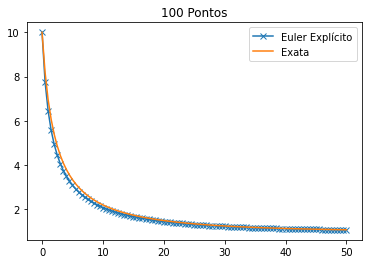

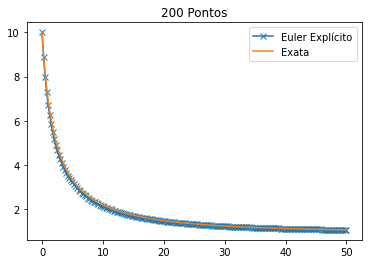

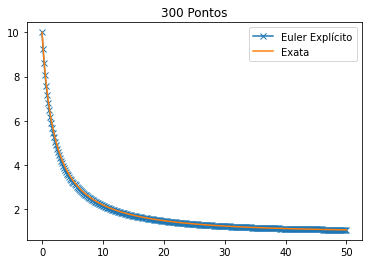

In [ ]:
refMax = 3
ti = 0
tf = 50
b = 10
nel = 100
lamb =  0.05
for k in range (0, refMax, 1):
  h = (tf-ti)/nel
  t = np.linspace(ti, tf, nel+1)
  tt = np.linspace(ti, tf, nel+1)
  plt.plot(t, Explicito(h, nel, b, lamb), '-x')
  plt.plot(tt,exata(b, lamb, tt))
  plt.legend(["Euler Explícito", "Exata",])
  plt.title("%d Pontos" %nel)
  plt.show()
  nel += 100

###Heun:

\begin{cases}
f_{j} = λy_{j}(1-y_{j}),
\\ f_{j+1} = λy_{j+1}(1-y_{j+1})
\\ Heun: f_{j+1} = f(t_{j} + h, y_{j} + hf_{j})
\\ De \ Euler \ Explícito: y_{j+1} = y_j + hf_j
\\ Então \ de: f_{j+1} = λy_{j+1}(1-y_{j+1})
\\ Vem: f_{j+1} = λ(y_j + hf_j)(1-(y_j + hf_j))
\\ f_{j+1} = λ(y_j + hf_j)(1 - y_j - hf_j)
\\ De \ Trapézios: y_{j+1} = y_j + \dfrac{h}{2}(f_{j+1} + f_j)
\\ Daí: y_{j+1} = y_j + \dfrac{h}{2}(λ(y_j + hf_j)(1 - y_j - hf_j) + f_j)
\end{cases}

In [ ]:
def Heun(h, nel, b, lamb):
  y = np.zeros(nel+1)
  y[0] = b
  for j in range(0, nel):
    dt = j*h
    fj = func(lamb, dt, y[j])
    y[j+1] = y[j] + (h/2)*(lamb*(y[j]+h*fj)*(1-y[j]-h*fj) + fj)
  return y

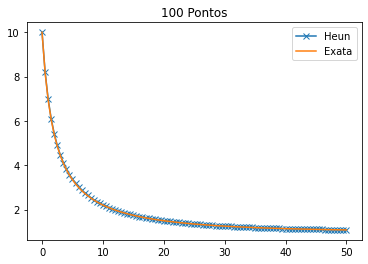

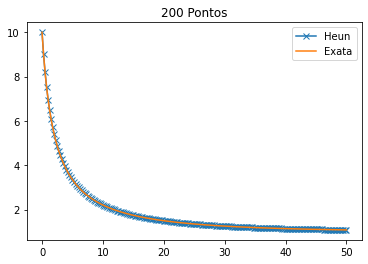

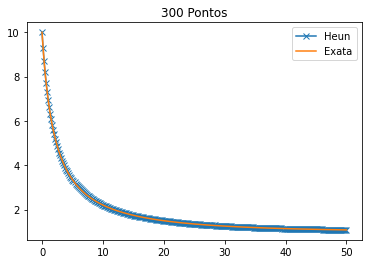

In [ ]:
refMax = 3
ti = 0
tf = 50
b = 10
nel = 100
lamb =  0.05
for k in range (0, refMax, 1):
  h = (tf-ti)/nel
  t = np.linspace(ti, tf, nel+1)
  tt = np.linspace(ti, tf, nel)
  plt.plot(t, Heun(h, nel, b, lamb), '-x')
  plt.plot(tt,exata(b, lamb, tt))
  plt.legend(["Heun", "Exata",])
  plt.title("%d Pontos" %nel)
  plt.show()
  nel += 100


\begin{eqnarray}
\end{eqnarray}
\begin{eqnarray}
\end{eqnarray}
\begin{eqnarray}
\end{eqnarray}
\begin{eqnarray}
\end{eqnarray}

###Leapfrog:

\begin{cases}
f_{j} = λy_{j}(1-y_{j}),
\\ Leapfrog: y_{j+1} = y_{j-1} + 2hf_j
\end{cases}

In [ ]:
def Leapfrog(h, nel, b, lamb):
  y = np.zeros(nel+1)
  y[0] = b
  y[1] = exata(b, lamb, 1.*h)
  for j in range(1, nel):
    dt = j*h
    fj = func(lamb, dt, y[j])
    y[j+1] = 2*h*lamb*y[j]*(1-y[j]) + y[j-1]
  return y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  


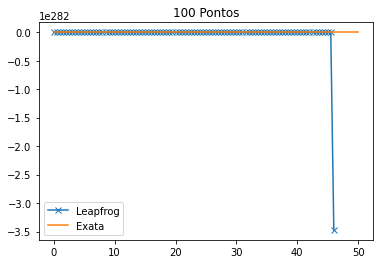

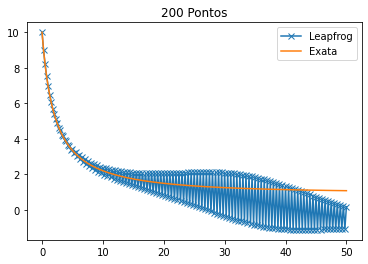

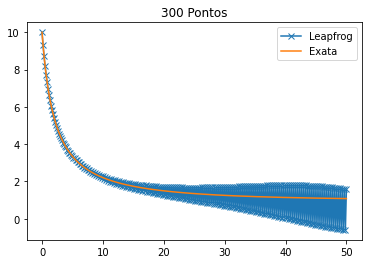

In [ ]:
refMax = 3
ti = 0
tf = 50
b = 10
nel = 100
lamb = 0.05
for k in range (0, refMax, 1):
  h = (tf-ti)/nel
  t = np.linspace(ti, tf, nel+1)
  tt = np.linspace(ti, tf, nel)
  plt.plot(t, Leapfrog(h, nel, b, lamb), '-x')
  plt.plot(tt,exata(b, lamb, tt))
  plt.legend(["Leapfrog", "Exata",])
  plt.title("%d Pontos" %nel)
  plt.show()
  nel += 100

###Runge-Kutta 4º Ordem:

\begin{cases}
f_{j} = λy_{j}(1-y_{j}),
\\ Runge-Kutta \ 4º \ Ordem: y_{j+1} = y_j + \dfrac{h}{6}(K_1 + 2K_2 + 2K_3 + K_4)
\\ K_1 = f_1 = f_j
\\ K_2 = f_2 = f(y_j + \dfrac{h}{2}f_1)
\\ K_3 = f_3 = f(y_j + \dfrac{h}{2}f_2)
\\ K_4 = f_4 = f(y_j + hf_3)
\end{cases}

In [ ]:
def RK4(h, nel, b, lamb):
  y = np.zeros(nel+1)
  y[0] = b
  for j in range(0, nel):
    dt = j*h
    f1 = func(lamb, dt, y[j])
    f2 = func(lamb, dt, y[j] + h*(f1/2))
    f3 = func(lamb, dt, y[j] + h*(f2/2))
    f4 = func(lamb, dt, y[j] + h*f3)  
    y[j+1] = y[j] + (h/6)*(f1 + 2*f2 + 2*f3 + f4)
  return y

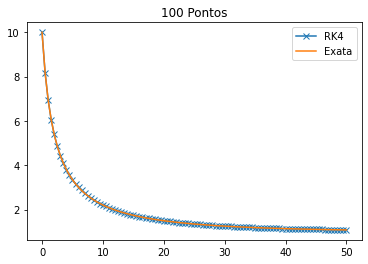

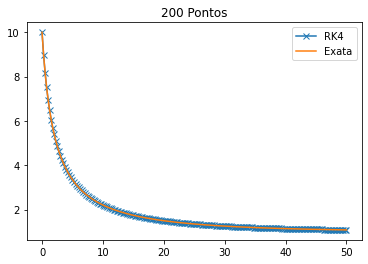

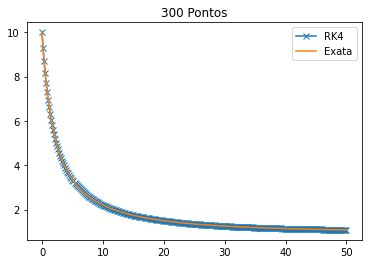

In [ ]:
refMax = 3
ti = 0
tf = 50
b = 10
nel = 100
lamb =  0.05
for k in range (0, refMax, 1):
  h = (tf-ti)/nel
  t = np.linspace(ti, tf, nel+1)
  tt = np.linspace(ti, tf, nel) 
  plt.plot(t, RK4(h, nel, b, lamb), '-x')
  plt.plot(tt,exata(b, lamb, tt))
  plt.legend(["RK4", "Exata",])
  plt.title("%d Pontos" %nel)
  plt.show()
  nel += 100

###Adams-Bashford 3º Ordem:

\begin{cases}
f_{j} = λy_{j}(1-y_{j}),
\\ Adams-Bashford \ de \ 3º \ Ordem: y_{j+1} = y_j + \dfrac{h}{12}(K_1 - K_2 + K_3)
\\ K_1 = 23f_j
\\ K_2 = -16f_{j-1}
\\ K_3 = 5f_{j-2}
\end{cases}

In [ ]:
def AB3RK4Inicial(h, nel, b, lamb):
  y = np.zeros(nel+1)
  y[0] = b
  
  for j in range(0, 2): 
    dt = j*h
    f1 = func(lamb, dt, y[j])
    f2 = func(lamb, dt, y[j] + h*(f1/2))
    f3 = func(lamb, dt, y[j] + h*(f2/2))
    f4 = func(lamb, dt, y[j] + h*f3)  
    y[j+1] = y[j] + (h/6)*(f1 + 2*f2 + 2*f3 + f4)
  
  for j in range(2, nel):
    dt = j*h
    k1 = 23*func(lamb, dt, y[j])
    k2 = 16*func(lamb, dt, y[j-1])
    k3 =  5*func(lamb, dt, y[j-2])
    y[j+1] = y[j] + (h/12)*(k1 - k2 + k3)
  return y

In [ ]:
def AB3HeunInicial(h, nel, b, lamb):
  y = np.zeros(nel+1)
  y[0] = b

  for j in range(0, 2): 
    dt = j*h
    fj = func(lamb, dt, y[j])
    y[j+1] = y[j] + (h/2)*(lamb*(y[j]+h*fj)*(1-y[j]-h*fj) + fj)

  for j in range(2, nel):
    dt = j*h
    k1 = 23*func(lamb, dt, y[j])
    k2 = 16*func(lamb, dt, y[j-1])
    k3 =  5*func(lamb, dt, y[j-2])
    y[j+1] = y[j] + (h/12)*(k1 - k2 + k3)
  return y

In [ ]:
def AB3(h, nel, b, lamb):
  y = np.zeros(nel+1)
  y[0] = b
  y[1] = exata(b, lamb, 1.*h)
  y[2] = exata(b, lamb, 2.*h)
  for j in range(2, nel):
    dt = j*h
    k1 = 23*func(lamb, dt, y[j])
    k2 = 16*func(lamb, dt, y[j-1])
    k3 =  5*func(lamb, dt, y[j-2])
    y[j+1] = y[j] + (h/12)*(k1 - k2 + k3)
  return y

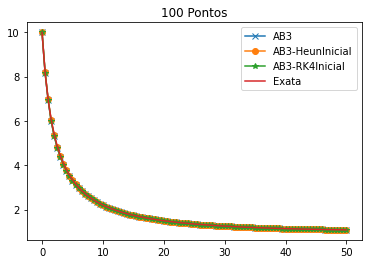

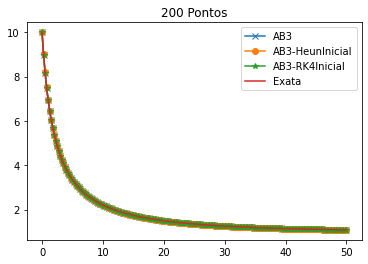

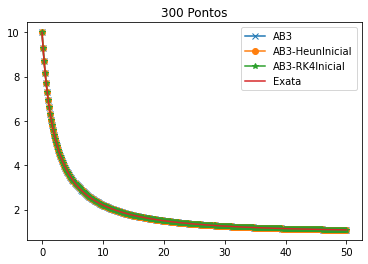

In [ ]:
refMax = 3
ti = 0
tf = 50
b = 10
nel = 100
lamb =  0.05
for k in range (0, refMax, 1):
  h = (tf-ti)/nel
  t = np.linspace(ti, tf, nel+1)
  tt = np.linspace(ti, tf, nel) 
  plt.plot(t, AB3(h, nel, b, lamb), '-x')
  plt.plot(t, AB3HeunInicial(h, nel, b, lamb), '-o')
  plt.plot(t, AB3RK4Inicial(h, nel, b, lamb), '-*')
  plt.plot(tt,exata(b, lamb, tt))
  plt.legend(["AB3", "AB3-HeunInicial", "AB3-RK4Inicial", "Exata",])
  plt.title("%d Pontos" %nel)
  plt.show()
  nel += 100

###Preditor-Corretor 4º Ordem


\begin{cases}
f_{j} = λy_{j}(1-y_{j}),
\\ Heun: y_{j+1} = y_j + \dfrac{h}{2}(λ(y_j + hf_j)(1 - y_j - hf_j) + f_j)
\\ Adams-Bashford \ de \ 4º \ Ordem: y_{j+1} = y_j + \dfrac{h}{24}(K_1 - K_2 + K_3 - K_4)
\\ K_1 = 55f_j
\\ K_2 = 59f_{j-1}
\\ K_3 = 37f_{j-2}
\\ K_4 = 9f_{j-3}
\\ Adams-Mouton \ de \ 4º \ Ordem: y_{j+1} = y_j + \dfrac{h}{24}(K_0 + K_1 - K_2 + K_3)
\\ K_0 = 9f_{j+1}
\\ K_1 = 19f_{j}
\\ K_2 = 5f_{j-1}
\\ K_3 = f_{j-2}
\end{cases}

In [ ]:
def PC4RK4Inicial(h, nel, b, lamb):
  y = np.zeros(nel+1)
  y[0] = b
  
  for j in range(0, 3): 
    dt = j*h
    f1 = func(lamb, dt, y[j])
    f2 = func(lamb, dt, y[j] + h*(f1/2))
    f3 = func(lamb, dt, y[j] + h*(f2/2))
    f4 = func(lamb, dt, y[j] + h*f3)  
    y[j+1] = y[j] + (h/6)*(f1 + 2*f2 + 2*f3 + f4)

  for j in range(3, nel):
    dt = j*h
    k1AB = 55*func(lamb, dt, y[j])
    k2AB = 59*func(lamb, dt, y[j-1])
    k3AB = 37*func(lamb, dt, y[j-2])
    k4AB =  9*func(lamb, dt, y[j-3])
    y[j+1] = y[j] + (h/24)*(k1AB - k2AB + k3AB - k4AB)
    k0AM =  9*func(lamb, dt, y[j+1])
    k1AM = 19*func(lamb, dt, y[j])
    k2AM =  5*func(lamb, dt, y[j-1])
    k3AM =    func(lamb, dt, y[j-2])
    y[j+1] = y[j] + (h/24)*(k0AM + k1AM - k2AM + k3AM)
  return y

In [ ]:
def PC4HeunInicial(h, nel, b, lamb):
  y = np.zeros(nel+1)
  y[0] = b
  
  for j in range(0, 3): 
    dt = j*h
    fj = func(lamb, dt, y[j])
    y[j+1] = y[j] + (h/2)*(lamb*(y[j]+h*fj)*(1-y[j]-h*fj) + fj)

  for j in range(3, nel):
    dt = j*h
    k1AB = 55*func(lamb, dt, y[j])
    k2AB = 59*func(lamb, dt, y[j-1])
    k3AB = 37*func(lamb, dt, y[j-2])
    k4AB =  9*func(lamb, dt, y[j-3])
    y[j+1] = y[j] + (h/24)*(k1AB - k2AB + k3AB - k4AB)
    k0AM =  9*func(lamb, dt, y[j+1])
    k1AM = 19*func(lamb, dt, y[j])
    k2AM =  5*func(lamb, dt, y[j-1])
    k3AM =    func(lamb, dt, y[j-2])
    y[j+1] = y[j] + (h/24)*(k0AM + k1AM - k2AM + k3AM)
  return y

In [ ]:
def PC4(h, nel, b, lamb):
  y = np.zeros(nel+1)
  y[0] = b
  y[1] = exata(b, lamb, 1.*h)
  y[2] = exata(b, lamb, 2.*h)
  y[3] = exata(b, lamb, 3.*h)
  for j in range(3, nel):
    dt = j*h
    k1AB = 55*func(lamb, dt, y[j])
    k2AB = 59*func(lamb, dt, y[j-1])
    k3AB = 37*func(lamb, dt, y[j-2])
    k4AB =  9*func(lamb, dt, y[j-3])
    y[j+1] = y[j] + (h/24)*(k1AB - k2AB + k3AB - k4AB)
    k0AM =  9*func(lamb, dt, y[j+1])
    k1AM = 19*func(lamb, dt, y[j])
    k2AM =  5*func(lamb, dt, y[j-1])
    k3AM =    func(lamb, dt, y[j-2])
    y[j+1] = y[j] + (h/24)*(k0AM + k1AM - k2AM + k3AM)
  return y

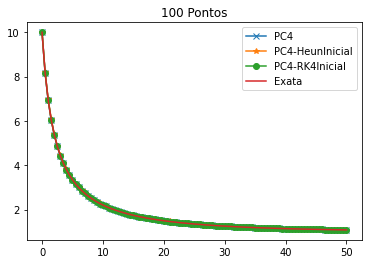

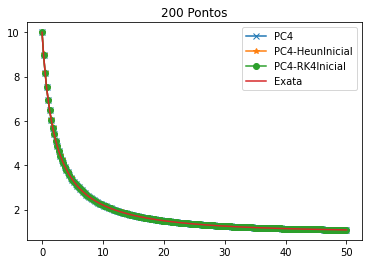

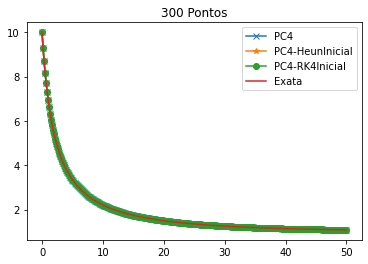

In [ ]:
refMax = 3
ti = 0
tf = 50
b = 10
nel = 100
lamb =  0.05
for k in range (0, refMax, 1):
  h = (tf-ti)/nel
  t = np.linspace(ti, tf, nel+1)
  tt = np.linspace(ti, tf, nel) 
  plt.plot(t, PC4(h, nel, b, lamb), '-x')
  plt.plot(t, PC4HeunInicial(h, nel, b, lamb), '-*')
  plt.plot(t, PC4RK4Inicial(h, nel, b, lamb), '-o')
  plt.plot(tt,exata(b, lamb, tt))
  plt.legend(["PC4", "PC4-HeunInicial", "PC4-RK4Inicial", "Exata",])
  plt.title("%d Pontos" %nel)
  plt.show()
  nel += 100

###Erros e Taxa Convergência

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  


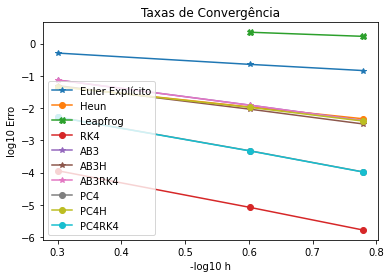

Euler Explícito:  1.132383597861282
Heun:  2.0846055691075986
Leapfrog:  0.7183996391825612
Runge-Kutta 4º Ordem:  3.84112522229465
Adams-Bashford 3º Ordem:  2.630816285511977
Adams-Bashford 3º Ordem com Heun Inicial:  2.480126368604959
Adams-Bashford 3º Ordem com RK4 Inicial:  2.6301963662418713
Preditor Corretor 4º Ordem:  3.5561737974316947
Preditor Corretor 4º Ordem com Heun Inicial:  2.2330547356789014
Preditor Corretor 4º Ordem com RK4 Inicial:  3.553239142765866


In [ ]:
refMax = 3
ti = 0
tf = 50
b = 10
nel = 100
lamb =  0.05

refin = np.zeros(refMax)
erro_Explicito = np.zeros(refMax)
erro_Heun = np.zeros(refMax)
erro_Leapfrog = np.zeros(refMax)
erro_RK4 = np.zeros(refMax)
erro_AB3 = np.zeros(refMax)
erro_AB3H = np.zeros(refMax)
erro_AB3RK4 = np.zeros(refMax)
erro_PC4 = np.zeros(refMax)
erro_PC4H = np.zeros(refMax)
erro_PC4RK4 = np.zeros(refMax)

for i in range (0, refMax, 1):
  h = (tf-ti)/nel
  t = np.linspace(ti, tf, nel+1)

  erro_Explicito[i] = np.max( np.abs(Explicito(h, nel, b, lamb) - exata(b, lamb, t) ) )
  erro_Heun[i] = np.max( np.abs(Heun(h, nel, b, lamb) - exata(b, lamb, t) ) )
  erro_Leapfrog[i] = np.max( np.abs(Leapfrog(h, nel, b, lamb) - exata(b, lamb, t) ) )
  erro_RK4[i] = np.max( np.abs(RK4(h, nel, b, lamb) - exata(b, lamb, t) ) )
  erro_AB3[i] = np.max( np.abs(AB3(h, nel, b, lamb) - exata(b, lamb, t) ) )
  erro_AB3H[i] = np.max( np.abs(AB3HeunInicial(h, nel, b, lamb) - exata(b, lamb, t) ) )
  erro_AB3RK4[i] = np.max( np.abs(AB3RK4Inicial(h, nel, b, lamb) - exata(b, lamb, t) ) )
  erro_PC4[i] = np.max( np.abs(PC4(h, nel, b, lamb) - exata(b, lamb, t) ) )
  erro_PC4H[i] = np.max( np.abs(PC4HeunInicial(h, nel, b, lamb) - exata(b, lamb, t) ) )
  erro_PC4RK4[i] = np.max( np.abs(PC4RK4Inicial(h, nel, b, lamb) - exata(b, lamb, t) ) )
  nel += 100
  refin[i] = h

plt.plot(-np.log10(refin),np.log10(erro_Explicito),'-*')
plt.plot(-np.log10(refin),np.log10(erro_Heun),'-o')
plt.plot(-np.log10(refin),np.log10(erro_Leapfrog),'-X')
plt.plot(-np.log10(refin),np.log10(erro_RK4),'-o')
plt.plot(-np.log10(refin),np.log10(erro_AB3),'-*')
plt.plot(-np.log10(refin),np.log10(erro_AB3H),'-*')
plt.plot(-np.log10(refin),np.log10(erro_AB3RK4),'-*')
plt.plot(-np.log10(refin),np.log10(erro_PC4),'-o')
plt.plot(-np.log10(refin),np.log10(erro_PC4H),'-o')
plt.plot(-np.log10(refin),np.log10(erro_PC4RK4),'-o')

plt.xlabel("-log10 h")
plt.ylabel("log10 Erro")
plt.legend(["Euler Explícito", "Heun", "Leapfrog", "RK4", "AB3", "AB3H", "AB3RK4", "PC4", "PC4H", "PC4RK4"])
plt.title("Taxas de Convergência")
plt.show()

print("Euler Explícito: ", (np.log10(erro_Explicito[refMax-1])-np.log10(erro_Explicito[0]))/(np.log10(refin[refMax-1])-np.log10(refin[0])))
print("Heun: ", (np.log10(erro_Heun[refMax-1])-np.log10(erro_Heun[0]))/(np.log10(refin[refMax-1])-np.log10(refin[0])))
print("Leapfrog: ", (np.log10(erro_Leapfrog[refMax-1])-np.log10(erro_Leapfrog[1]))/(np.log10(refin[refMax-1])-np.log10(refin[1])))
print("Runge-Kutta 4º Ordem: ", (np.log10(erro_RK4[refMax-1])-np.log10(erro_RK4[0]))/(np.log10(refin[refMax-1])-np.log10(refin[0])))
print("Adams-Bashford 3º Ordem: ", (np.log10(erro_AB3[refMax-1])-np.log10(erro_AB3[0]))/(np.log10(refin[refMax-1])-np.log10(refin[0])))
print("Adams-Bashford 3º Ordem com Heun Inicial: ", (np.log10(erro_AB3H[refMax-1])-np.log10(erro_AB3H[0]))/(np.log10(refin[refMax-1])-np.log10(refin[0])))
print("Adams-Bashford 3º Ordem com RK4 Inicial: ", (np.log10(erro_AB3RK4[refMax-1])-np.log10(erro_AB3RK4[0]))/(np.log10(refin[refMax-1])-np.log10(refin[0])))
print("Preditor Corretor 4º Ordem: ", (np.log10(erro_PC4[refMax-1])-np.log10(erro_PC4[0]))/(np.log10(refin[refMax-1])-np.log10(refin[0])))
print("Preditor Corretor 4º Ordem com Heun Inicial: ", (np.log10(erro_PC4H[refMax-1])-np.log10(erro_PC4H[0]))/(np.log10(refin[refMax-1])-np.log10(refin[0])))
print("Preditor Corretor 4º Ordem com RK4 Inicial: ", (np.log10(erro_PC4RK4[refMax-1])-np.log10(erro_PC4RK4[0]))/(np.log10(refin[refMax-1])-np.log10(refin[0])))


#Questão 3

Resolver o problema y
\begin{eqnarray}
y' = -100y + 100t + 101,  \ \ \ \ y(0) = 1.1.
\end{eqnarray}
Solução Exata
\begin{eqnarray}
y(t) = 1 + t + ce^{-100t},  \ \ \ \ y(0) = 1.1.
\\ Daí: y(0) = 1 + 0 + ce^{-100*0}
\\ y(0) = 1 + c = 1.1
\\ c = 0.1
\end{eqnarray}

Por:
Euler explícito;
Euler implícito;
Método dos trapézios.

Considere T = 1 e com número de pontos nel = 10, nel = 50, nel = 100. 
Apresente o gráfico dos resultados e comente o desempenho dos
diferentes métodos empregados.
Decida o método mais adequado para resolver este tipo de problema


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def exata(t):
  c = 0.1
  return 1 + t + c*np.exp(-100*t)

In [ ]:
def func(t, y):
  return -100*y + 100*t + 101

\begin{cases}
f_{j} = -100y + 100t + 101
\\
\\ Explícito: \ y_{j+1} = y_{j} + hf_{j}
\\ Implícito: \ y_{j+1} = y_{j} + hf_{j+1}
\\ Trapézios: \ y_{j+1} = y_{j} + \dfrac{h}{2}(f_{j+1} + f_{j})
\end{cases}

**Explícito:**

\begin{cases}
f_{j} = -100y + 100t + 101
\\
\\ Explícito: \ y_{j+1} = y_{j} - hf_{j}
\\ y_{j+1} = y_{j} - h(-100y_j + 100t + 101)
\end{cases}

In [ ]:
def Explicito(h, nel, b):
  y = np.zeros(nel+1)
  y[0] = b
  for j in range(0, nel):
    dt = j*h
    y[j+1] = y[j] + h*func(dt,y[j])
  return y

**Implícito:**

\begin{cases}
f_{j} = -100y + 100t + 101
\\
\\ Implícito: \ y_{j+1} = y_{j} + hf_{j+1}
\\ y_{j+1} = y_{j} + h(-100y_{j+1} + 100t + 101)
\\ y_{j+1} + 100hy_{j+1} = y_{j} + 100ht + 101h
\\ (1 + 100h)y_{j+1} = y_{j} + 100ht + 101h
\\ y_{j+1} = \dfrac{y_{j} + 100ht + 101h}{1 + 100h}
\end{cases}

In [ ]:
def Implicito(h, nel, b):
  y = np.zeros(nel+1)
  y[0] = b
  for j in range(0, nel):
    dt = j*h
    y[j+1] = (y[j] + 100*h*dt + 101*h)/(1 + 100*h)
  return y

**Trapézio:**


\begin{cases}
f_{j} = -100y + 100t + 101
\\
\\ Trapézios: \  y_{j+1} = y_{j} + \dfrac{h}{2}(f_{j+1} + f_{j})
\\ y_{j+1} = y_{j} + \dfrac{h}{2}(-100y_{j+1} + 100t + 101 + f_{j})
\\ y_{j+1} + \dfrac{h}{2}100y_{j+1} = y_{j} + \dfrac{h}{2}(100t + 101 + f_j)
\\ (1 + 50h)y_{j+1} = y_{j} + \dfrac{h}{2}(100t + 101 + f_j)
\\ y_{j+1} = \dfrac{y_{j} + \dfrac{h}{2}(100t + 101 + f_j)}{(1 + 50h)}
\end{cases}

In [ ]:
def Trapezio(h, nel, b):
  y = np.zeros(nel+1)
  y[0] = b
  for j in range(0, nel):
    dt = j*h
    y[j+1] = (y[j] + (h/2)*(100*dt + 101 + func(dt,y[j])))/(1 + 50*h)
  return y

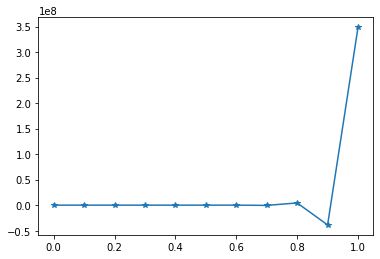

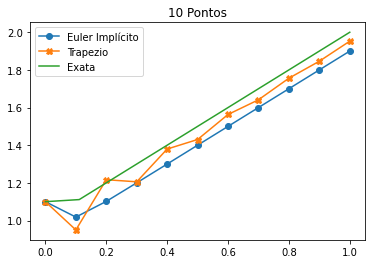

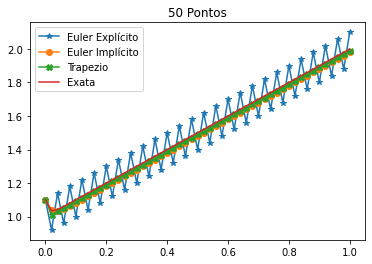

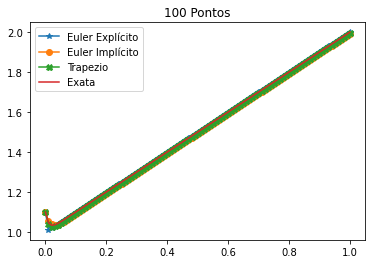

In [ ]:
refMax = 3
ti = 0
tf = 1
b = 1.1
nel = 10
for k in range (0, refMax, 1):
  h = (tf - ti)/nel
  nel = int(nel)
  t = np.linspace(ti, tf, nel+1)
  tt = np.linspace(ti, tf, nel)
  plt.plot(t, Explicito(h, nel, b), '-*')
  if(k == 0):
    plt.show()
  plt.plot(t, Implicito(h, nel, b), '-o')
  plt.plot(t, Trapezio(h, nel, b), '-X') 
  plt.plot(tt,exata(tt))
  plt.legend(["Euler Explícito", "Euler Implícito", "Trapezio", "Exata"])
  if(k == 0):
    plt.legend(["Euler Implícito", "Trapezio", "Exata"])
  plt.title("%d Pontos" % nel)
  plt.show()
  nel = 50*(k+1)

Euler explícito está instável

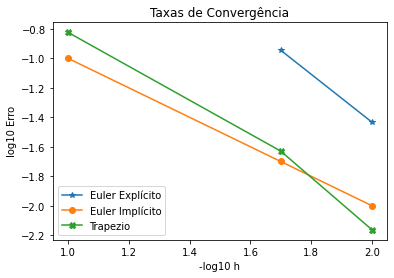

Euler Explícito:  1.625813452970565
Euler Implícito:  0.9999999999665004
Trapezio:  1.3393461055000797


In [ ]:
refMax = 3
ti = 0
tf = 1
b = 1.1
nel = 10

refin = np.zeros(refMax)
erro_Explicito = np.zeros(refMax)
erro_Implicito = np.zeros(refMax)
erro_Trapezio = np.zeros(refMax)

for i in range (0, refMax, 1):
  h = (tf-ti)/nel
  t = np.linspace(ti, tf, nel+1)

  erro_Explicito[i] = np.max( np.abs(Explicito(h, nel, b) - exata(t) ) )
  erro_Implicito[i] = np.max( np.abs(Implicito(h, nel, b) - exata(t) ) )
  erro_Trapezio[i] = np.max( np.abs(Trapezio(h, nel, b) - exata(t) ) )
  nel = 50*(i+1)
  refin[i] = h

erro_Explicito = erro_Explicito[1:]
refinExplicito = refin[1:]
plt.plot(-np.log10(refinExplicito),np.log10(erro_Explicito),'-*')
plt.plot(-np.log10(refin),np.log10(erro_Implicito),'-o')
plt.plot(-np.log10(refin),np.log10(erro_Trapezio),'-X')

plt.xlabel("-log10 h")
plt.ylabel("log10 Erro")
plt.legend(["Euler Explícito", "Euler Implícito", "Trapezio", "RK4", "AB3", "AB3H", "AB3RK4", "PC4", "PC4H", "PC4RK4"])
plt.title("Taxas de Convergência")
plt.show()

print("Euler Explícito: ", (np.log10(erro_Explicito[refMax-2])-np.log10(erro_Explicito[0]))/(np.log10(refinExplicito[refMax-2])-np.log10(refinExplicito[0])))
print("Euler Implícito: ", (np.log10(erro_Implicito[refMax-1])-np.log10(erro_Implicito[0]))/(np.log10(refin[refMax-1])-np.log10(refin[0])))
print("Trapezio: ", (np.log10(erro_Trapezio[refMax-1])-np.log10(erro_Trapezio[0]))/(np.log10(refin[refMax-1])-np.log10(refin[0])))  

#Questao 4

Considere o problema do oscilador harmônico simples:
Seja
$$ y' = v,  \ \ \ \ y_{0} = 0.4 $$
$$ v' = \dfrac{F(y)}{m}, \ \ \ \ v_{0} = 0, \ \ m = 0.160 $$
$$ F(y) = -ky, \ \ \ \ k = 8 $$
Solução Exata
$$ y(t) = y_0cos(\omega t), \ \ \ \ \omega = \sqrt{\dfrac{k}{m}} $$

Aplicar os métodos:
Euler sympletic,
Velocity-Verlet,
Runge-Kutta 4ª Ordem.

Para tal, considerar: T = 10 (Apenas Euler Sympletic), T = 400, Intervalos de discretização h = 0.1

Apresentar o gráfico dos resultados e comentar o desempenho dos diferentes métodos empregados em termos de conservação de energia do sistema.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def exata(y0, omega, t):
  return y0*np.cos(omega*t), -omega*y0*np.sin(omega*t)

In [ ]:
def gunc(omega, t, y):
  omega2 = omega*omega
  return -omega2*y

In [ ]:
def Hamiltoniano(m, k, y, v):
  return (m/2)*(v*v) + (k/2)*(y*y)

\begin{cases}
f_j = v_j
\\ g_j = \dfrac{F(y_j)}{m}
\\F(y_j) = -ky_j
\\Euler Sympletic:
\\y_{j+1} = y_j + hv_j
\\v_{j+1} = v_j + \dfrac{h}{m}F(y_{j+1})
\\v_{j+1} = v_j - \dfrac{h}{m}Ky_{j+1}
\\v_{j+1} = v_j - \dfrac{h}{m}K(y_j + hv_j)
\end{cases}

In [ ]:
def ESympletic(h, nel, y0, v0, omega):
  y = np.zeros(nel+1)
  v = np.zeros(nel+1)
  y[0] = y0
  v[0] = v0
  for j in range(0, nel):
    dt = j*h
    y[j+1] = y[j] + h*v[j]
    v[j+1] = v[j] + h*gunc(omega, dt, y[j+1])
  return y, v

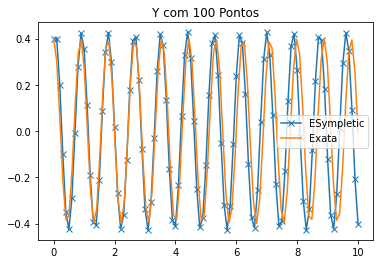

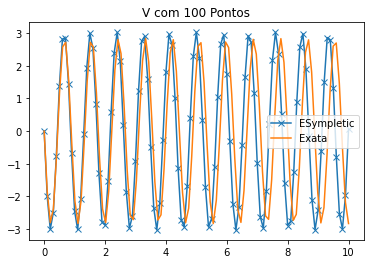

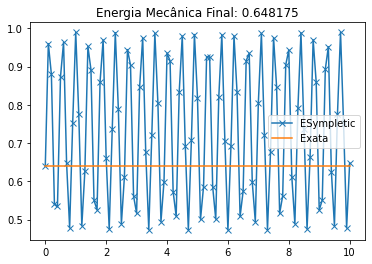

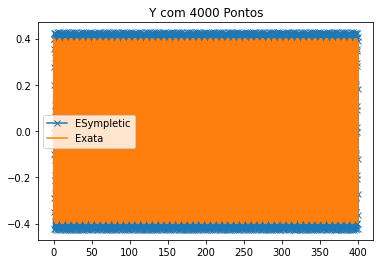

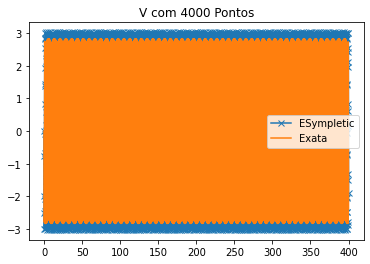

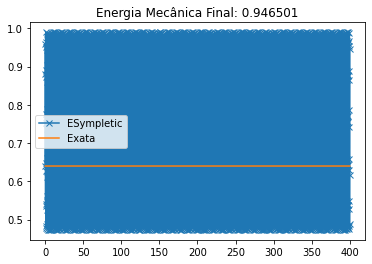

In [ ]:
refMax = 2
ti = 0
tf = 10
y0 = 0.4
v0 = 0
h = 0.1
k = 8
m = 0.16
omega = np.sqrt(k/m)
for i in range (0, refMax, 1):
  nel = (tf-ti)/h
  nel = int(nel)
  t = np.linspace(ti, tf, nel+1)
  tt = np.linspace(ti, tf, nel)
  y, v = ESympletic(h, nel, y0, v0, omega)
  exatay, exatav = exata(y0, omega, tt)

  Hamilton = np.zeros(nel+1)
  Hamilton = Hamiltoniano(m, k, y, v)
  HamiltonExato = np.zeros(nel+1)
  HamiltonExato = Hamiltoniano(m, k, exatay, exatav)
  plt.plot(t, y, '-x')
  plt.plot(tt, exatay)
  plt.legend(["ESympletic", "Exata",])
  plt.title("Y com %d Pontos" %nel)
  plt.show()
  plt.plot(t, v, '-x')
  plt.plot(tt, exatav)
  plt.legend(["ESympletic", "Exata",])
  plt.title("V com %d Pontos" %nel)
  plt.show()
  plt.plot(t, Hamilton, '-x')
  plt.plot(tt, HamiltonExato )
  plt.legend(["ESympletic", "Exata",])
  plt.title("Energia Mecânica Final: %f" %Hamilton[nel])
  plt.show()
  tf += 390

\begin{cases}
f_j = v_j
\\ g_j = \dfrac{F(y_j)}{m}
\\F(y_j) = -ky_j
\\Velocity-Verlet:
\\ y_{j+1} = y_j + \dfrac{h}{2}(v_j + v_{j+1})
\\ y_{j+1} = y_j + \dfrac{h}{2}(v_j + v_j + \dfrac{h}{m}F(y_{j+1}))
\\ y_{j+1} = y_j + hv_j + \dfrac{h^2}{2m}F(y_j)
\\ y_{j+1} = y_j + hv_j - \dfrac{h^2}{2m}Ky_j
\\ y_{j+1} = y_j + hv_j - \omega^2\dfrac{h^2}{2}y_j
\\v_{j+1} = v_j + \dfrac{h}{2m}(F(y_{j+1}) + F(y_j))
\\v_{j+1} = v_j - \dfrac{h}{2m}(K(y_{j+1}) + K(y_j))
\\v_{j+1} = v_j - \omega^2\dfrac{h}{2}((y_{j+1}) + (y_j))
\\v_{j+1} = v_j - \omega^2\dfrac{h}{2}((y_j + hv_j - \omega^2\dfrac{h^2}{2}y_j) + (y_j))
\\v_{j+1} = v_j -\omega^2hy_j - \omega^2\dfrac{h^2}{2}v_j  + \omega^4\dfrac{h^3}{4}y_j
\\v_{j+1} = v_j -\omega^2hy_j(1 - \omega^2\dfrac{h^2}{4}) - \omega^2\dfrac{h^2}{2}v_j
\end{cases}

In [ ]:
def VVerlet(h, nel, y0, v0, omega):
  y = np.zeros(nel+1)
  v = np.zeros(nel+1)
  y[0] = y0
  v[0] = v0
  h2 = h*h
  h3 = h2*h
  omega2 = omega*omega
  for j in range(0, nel):
    dt = j*h
    y[j+1] = y[j] + h*v[j] + h2/2*gunc(omega, dt, y[j])
    v[j+1] = v[j] + h*gunc(omega, dt, y[j])*(1 - omega2*h2/4) - h2/2*omega2*v[j]
  return y, v

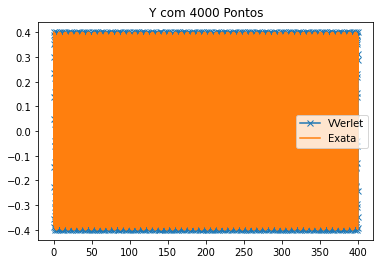

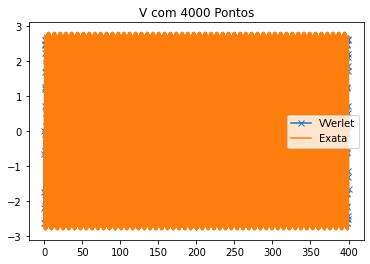

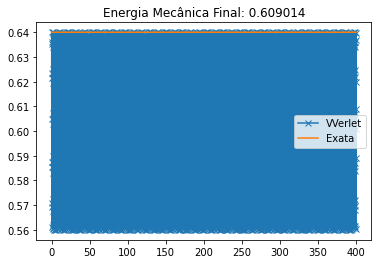

In [ ]:
ti = 0
tf = 400
y0 = 0.4
v0 = 0
h = 0.1
k = 8
m = 0.16
omega = np.sqrt(k/m)
nel = (tf-ti)/h
nel = int(nel)
t = np.linspace(ti, tf, nel+1)
tt = np.linspace(ti, tf, nel)
y, v = VVerlet(h, nel, y0, v0, omega)
exatay, exatav = exata(y0, omega, tt)

Hamilton = np.zeros(nel+1)
Hamilton = Hamiltoniano(m, k, y, v)
HamiltonExato = np.zeros(nel+1)
HamiltonExato = Hamiltoniano(m, k, exatay, exatav)

plt.plot(t, y, '-x')
plt.plot(tt, exatay)
plt.legend(["VVerlet", "Exata",])
plt.title("Y com %d Pontos" %nel)
plt.show()
plt.plot(t, v, '-x')
plt.plot(tt, exatav)
plt.legend(["VVerlet", "Exata",])
plt.title("V com %d Pontos" %nel)
plt.show()
plt.plot(t, Hamilton, '-x')
plt.plot(tt, HamiltonExato )
plt.legend(["VVerlet", "Exata",])
plt.title("Energia Mecânica Final: %f" %Hamilton[nel])
plt.show()

\begin{cases}
f_j = v_j
\\ g_j = \dfrac{F(y_j)}{m}
\\F(y_j) = -ky_j
\\ Runge-Kutta \ 4º \ Ordem: y_{j+1} = y_j + \dfrac{h}{6}(K_1 + 2K_2 + 2K_3 + K_4)
\\ K_1 = f_1 = f_j
\\ K_2 = f_2 = f(y_j + \dfrac{h}{2}g_1)
\\ K_3 = f_3 = f(y_j + \dfrac{h}{2}g_2)
\\ K_4 = f_4 = f(y_j + hg_3)
\\
\\v_{j+1} = v_j + \dfrac{h}{m}F(y_{j+1})
\\v_{j+1} = v_j - ω^2hy_{j+1}
\\Em \ Runge-Kutta \ 4º \ Ordem: v_{j+1} = v_j + \dfrac{h}{6}(K_1 + 2K_2 + 2K_3 + K_4)
\\ K_1 = g_1 = g_j
\\ K_2 = g_2 = g(v_j + \dfrac{h}{2}f_1)
\\ K_3 = g_3 = g(v_j + \dfrac{h}{2}f_2)
\\ K_4 = g_4 = g(v_j + hf_3)
\end{cases}

In [ ]:
def RK4(h, nel, y0, v0, omega):
  y = np.zeros(nel+1)
  v = np.zeros(nel+1)
  y[0] = y0
  v[0] = v0
  for j in range(0, nel):
    dt = j*h
    f1 = v[j]
    g1 = gunc(omega, dt, y[j])
    
    f2 = v[j] + h*g1/2
    g2 = gunc(omega, dt, y[j] + h*f1/2)
    
    f3 = v[j] + h*g2/2  
    g3 = gunc(omega, dt, y[j] + h*f2/2)

    f4 = v[j] + h*g3
    g4 = gunc(omega, dt, y[j] + h*f3)

    y[j+1] = y[j] + (h/6)*(f1 + 2*f2 + 2*f3 + f4)
    v[j+1] = v[j] + (h/6)*(g1 + 2*g2 + 2*g3 + g4)
  return y, v

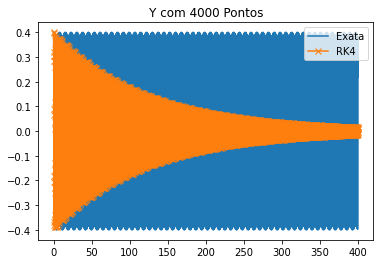

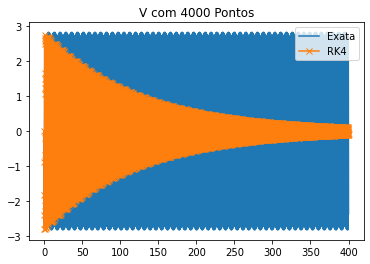

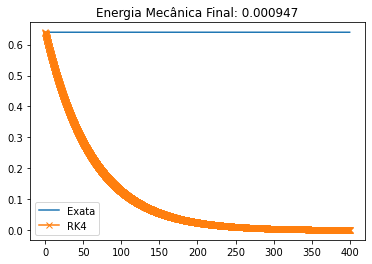

In [ ]:
ti = 0
tf = 400
y0 = 0.4
v0 = 0
h = 0.1
k = 8
m = 0.16
omega = np.sqrt(k/m)
nel = (tf-ti)/h
nel = int(nel)
t = np.linspace(ti, tf, nel+1)
tt = np.linspace(ti, tf, nel)
y, v = RK4(h, nel, y0, v0, omega)
exatay, exatav = exata(y0, omega, tt)

Hamilton = np.zeros(nel+1)
Hamilton = Hamiltoniano(m, k, y, v)
HamiltonExato = np.zeros(nel+1)
HamiltonExato = Hamiltoniano(m, k, exatay, exatav)

plt.plot(tt, exatay)
plt.plot(t, y, '-x')
plt.legend(["Exata", "RK4"])
plt.title("Y com %d Pontos" %nel)
plt.show()
plt.plot(tt, exatav)
plt.plot(t, v, '-x')
plt.legend(["Exata", "RK4",])
plt.title("V com %d Pontos" %nel)
plt.show()
plt.plot(tt, HamiltonExato )
plt.plot(t, Hamilton, '-x')
plt.legend(["Exata", "RK4"])
plt.title("Energia Mecânica Final: %f" %Hamilton[nel])
plt.show()